In [25]:
## impports very important libraries run this cell first (TeaToCodeConverter)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf

# Data Imports

importing unlabeled  data as U1
importing labeled data as L1

In [26]:
u1 = pd.read_csv("../../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None)
l1 = pd.read_csv("../../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','diagnosis'])
print("u1")
print(u1.head())
print("l1")
print(l1.head())


u1
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2
l1
        id  clump_thickness  uniformity_of_cell_size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  1016277                6                        8   
4  1017023                4                        1   

   uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8        

In [27]:
l1.shape
u1.shape

(699, 11)

699 rows and 11 columns

In [28]:
l1.head()
u1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [29]:
l1.isnull().sum()
u1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

no missing values

Write to CSV file just in case

In [30]:
l1.to_csv('breast-cancer-data.csv')

In [31]:
l1.describe()
u1.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [32]:
print("clump_thickness: " + str(l1.clump_thickness.count()))

clump_thickness: 699


In [33]:
l1.columns

#checking for unique variables in the df
print("")
print("Checking for unique variables in the dataframe")
print("")

for l in l1.columns:
    print(str(l) + ": " + str(l1[l].nunique()))

#checking for any null values
print("")
print("Checking for null values")
l1.isnull().sum()


Checking for unique variables in the dataframe

id: 645
clump_thickness: 10
uniformity_of_cell_size: 10
uniformity_of_cell_shape: 10
marginal_adhesion: 10
single_epithelial_cell_size: 10
bare_nuclei: 11
bland_chromatin: 10
normal_nucleoli: 10
mitoses: 9
diagnosis: 2

Checking for null values


id                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
diagnosis                      0
dtype: int64

In [34]:
#finding the boundaries of columns
print("")
print("Finding boundaries of each column")

for l in l1.columns:
    print(f'{l}: {l1[l].min()} - {l1[l].max()}')


Finding boundaries of each column
id: 61634 - 13454352
clump_thickness: 1 - 10
uniformity_of_cell_size: 1 - 10
uniformity_of_cell_shape: 1 - 10
marginal_adhesion: 1 - 10
single_epithelial_cell_size: 1 - 10
bare_nuclei: 1 - ?
bland_chromatin: 1 - 10
normal_nucleoli: 1 - 10
mitoses: 1 - 10
diagnosis: 2 - 4


Checing the datatypes of each column

In [35]:
l1.dtypes

id                              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
diagnosis                       int64
dtype: object

Change bare_nuclei to numeric

In [36]:
# l1['bare_nuclei']=l1['bare_nuclei'].astype(int)

Variance of each column

In [37]:
for i in l1.columns:
    if i != 'bare_nuclei':
        print(f'{i}: {l1[i].var()}')

id: 380807139761.1464
clump_thickness: 7.928395456464618
uniformity_of_cell_size: 9.311402699722485
uniformity_of_cell_shape: 8.832265495939758
marginal_adhesion: 8.153190599751591
single_epithelial_cell_size: 4.903123988013986
bland_chromatin: 5.945620227012802
normal_nucleoli: 9.324679956220717
mitoses: 2.941492348873339
diagnosis: 0.9049194305413792


Scattering graphs

In [38]:
for i in l1.columns:
    print(f'{i}')
    plt.scatter(l1[i], l1['diagnosis'])
    plt.show()

id


KeyError: 'class'

Histograms

id


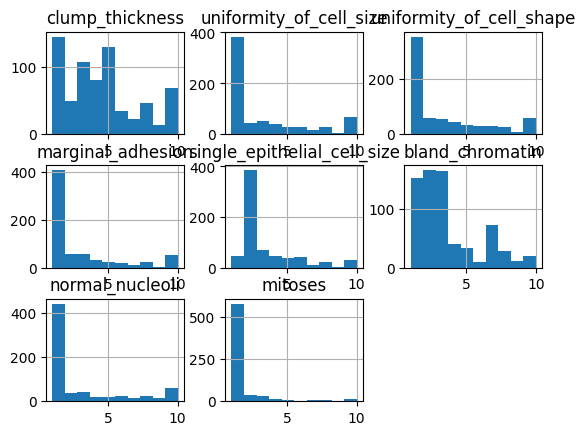

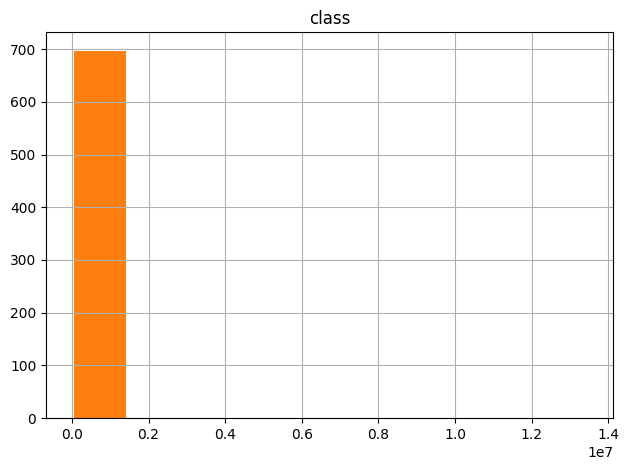

clump_thickness


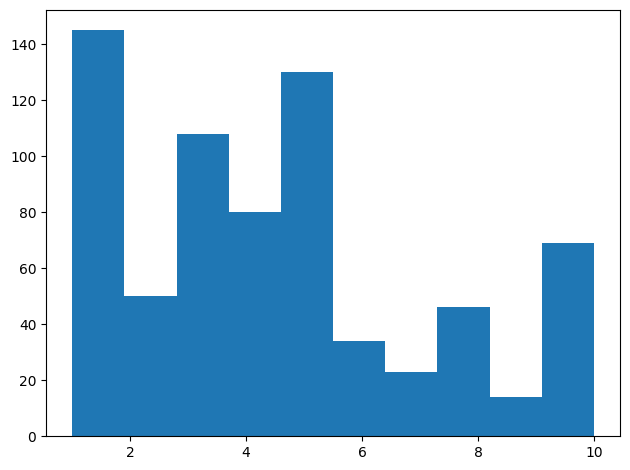

uniformity_of_cell_size


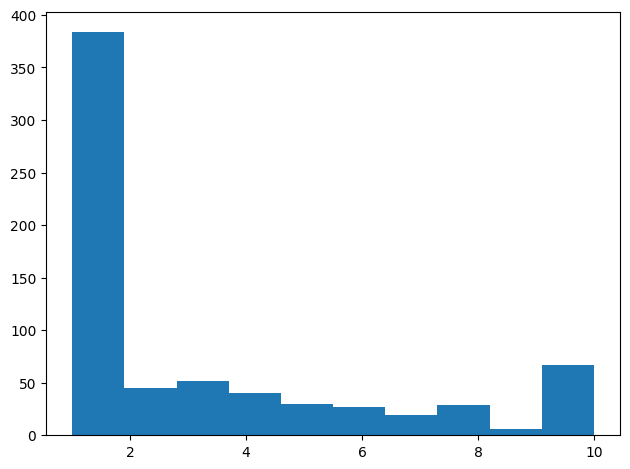

uniformity_of_cell_shape


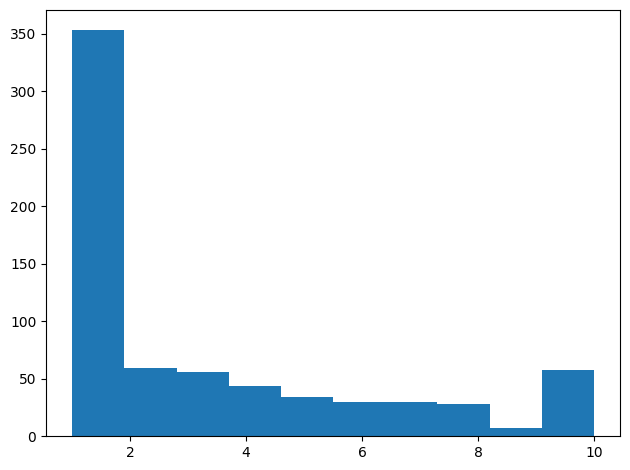

marginal_adhesion


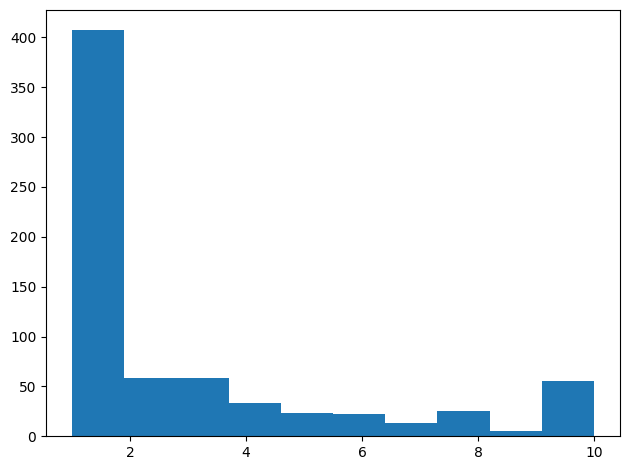

single_epithelial_cell_size


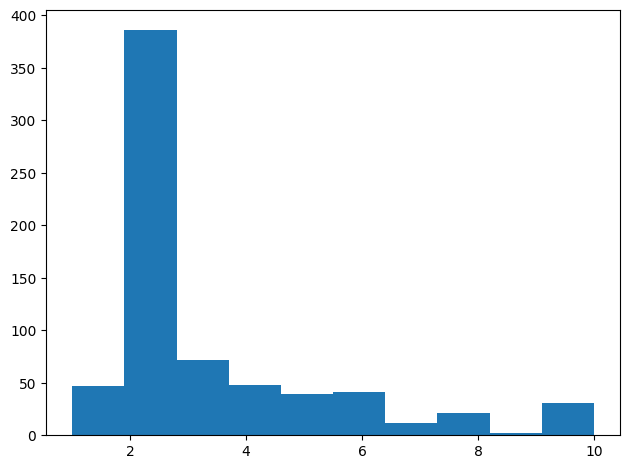

bare_nuclei


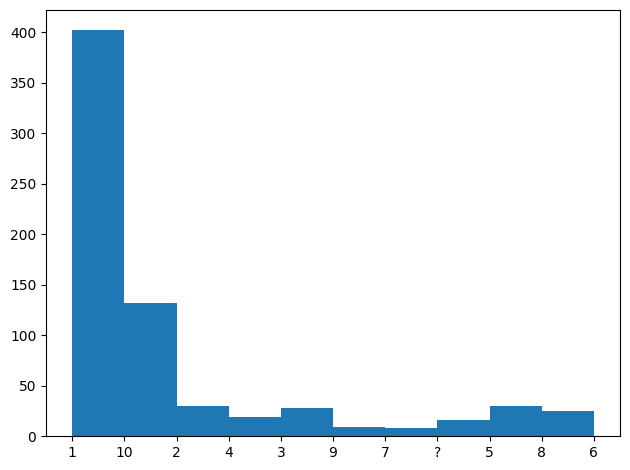

bland_chromatin


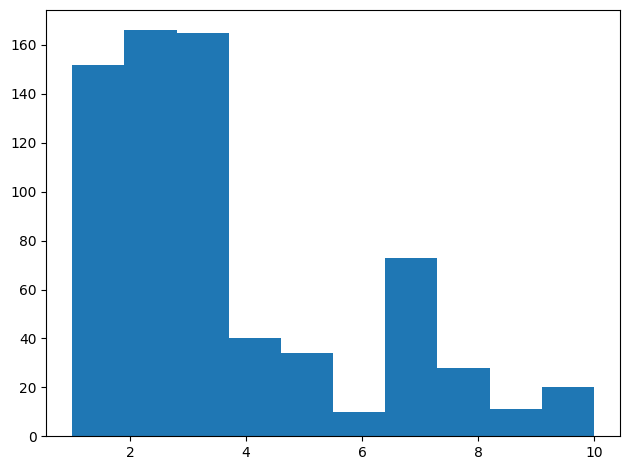

normal_nucleoli


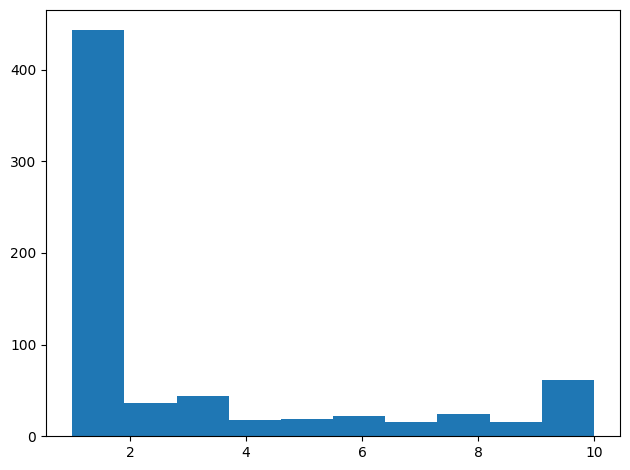

mitoses


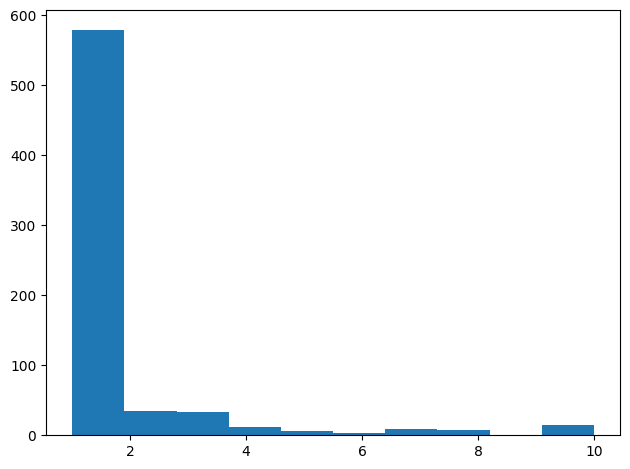

class


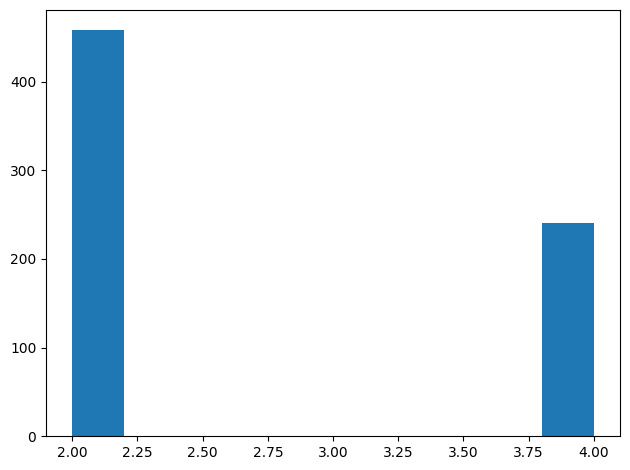

In [ ]:
l1.hist(column=['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'])

l1.hist(column=['class'],bins=5)

for i in l1.columns:
    print(f'{i}')
    plt.hist(l1[i])
    plt.tight_layout()
    plt.show()

Pairplot

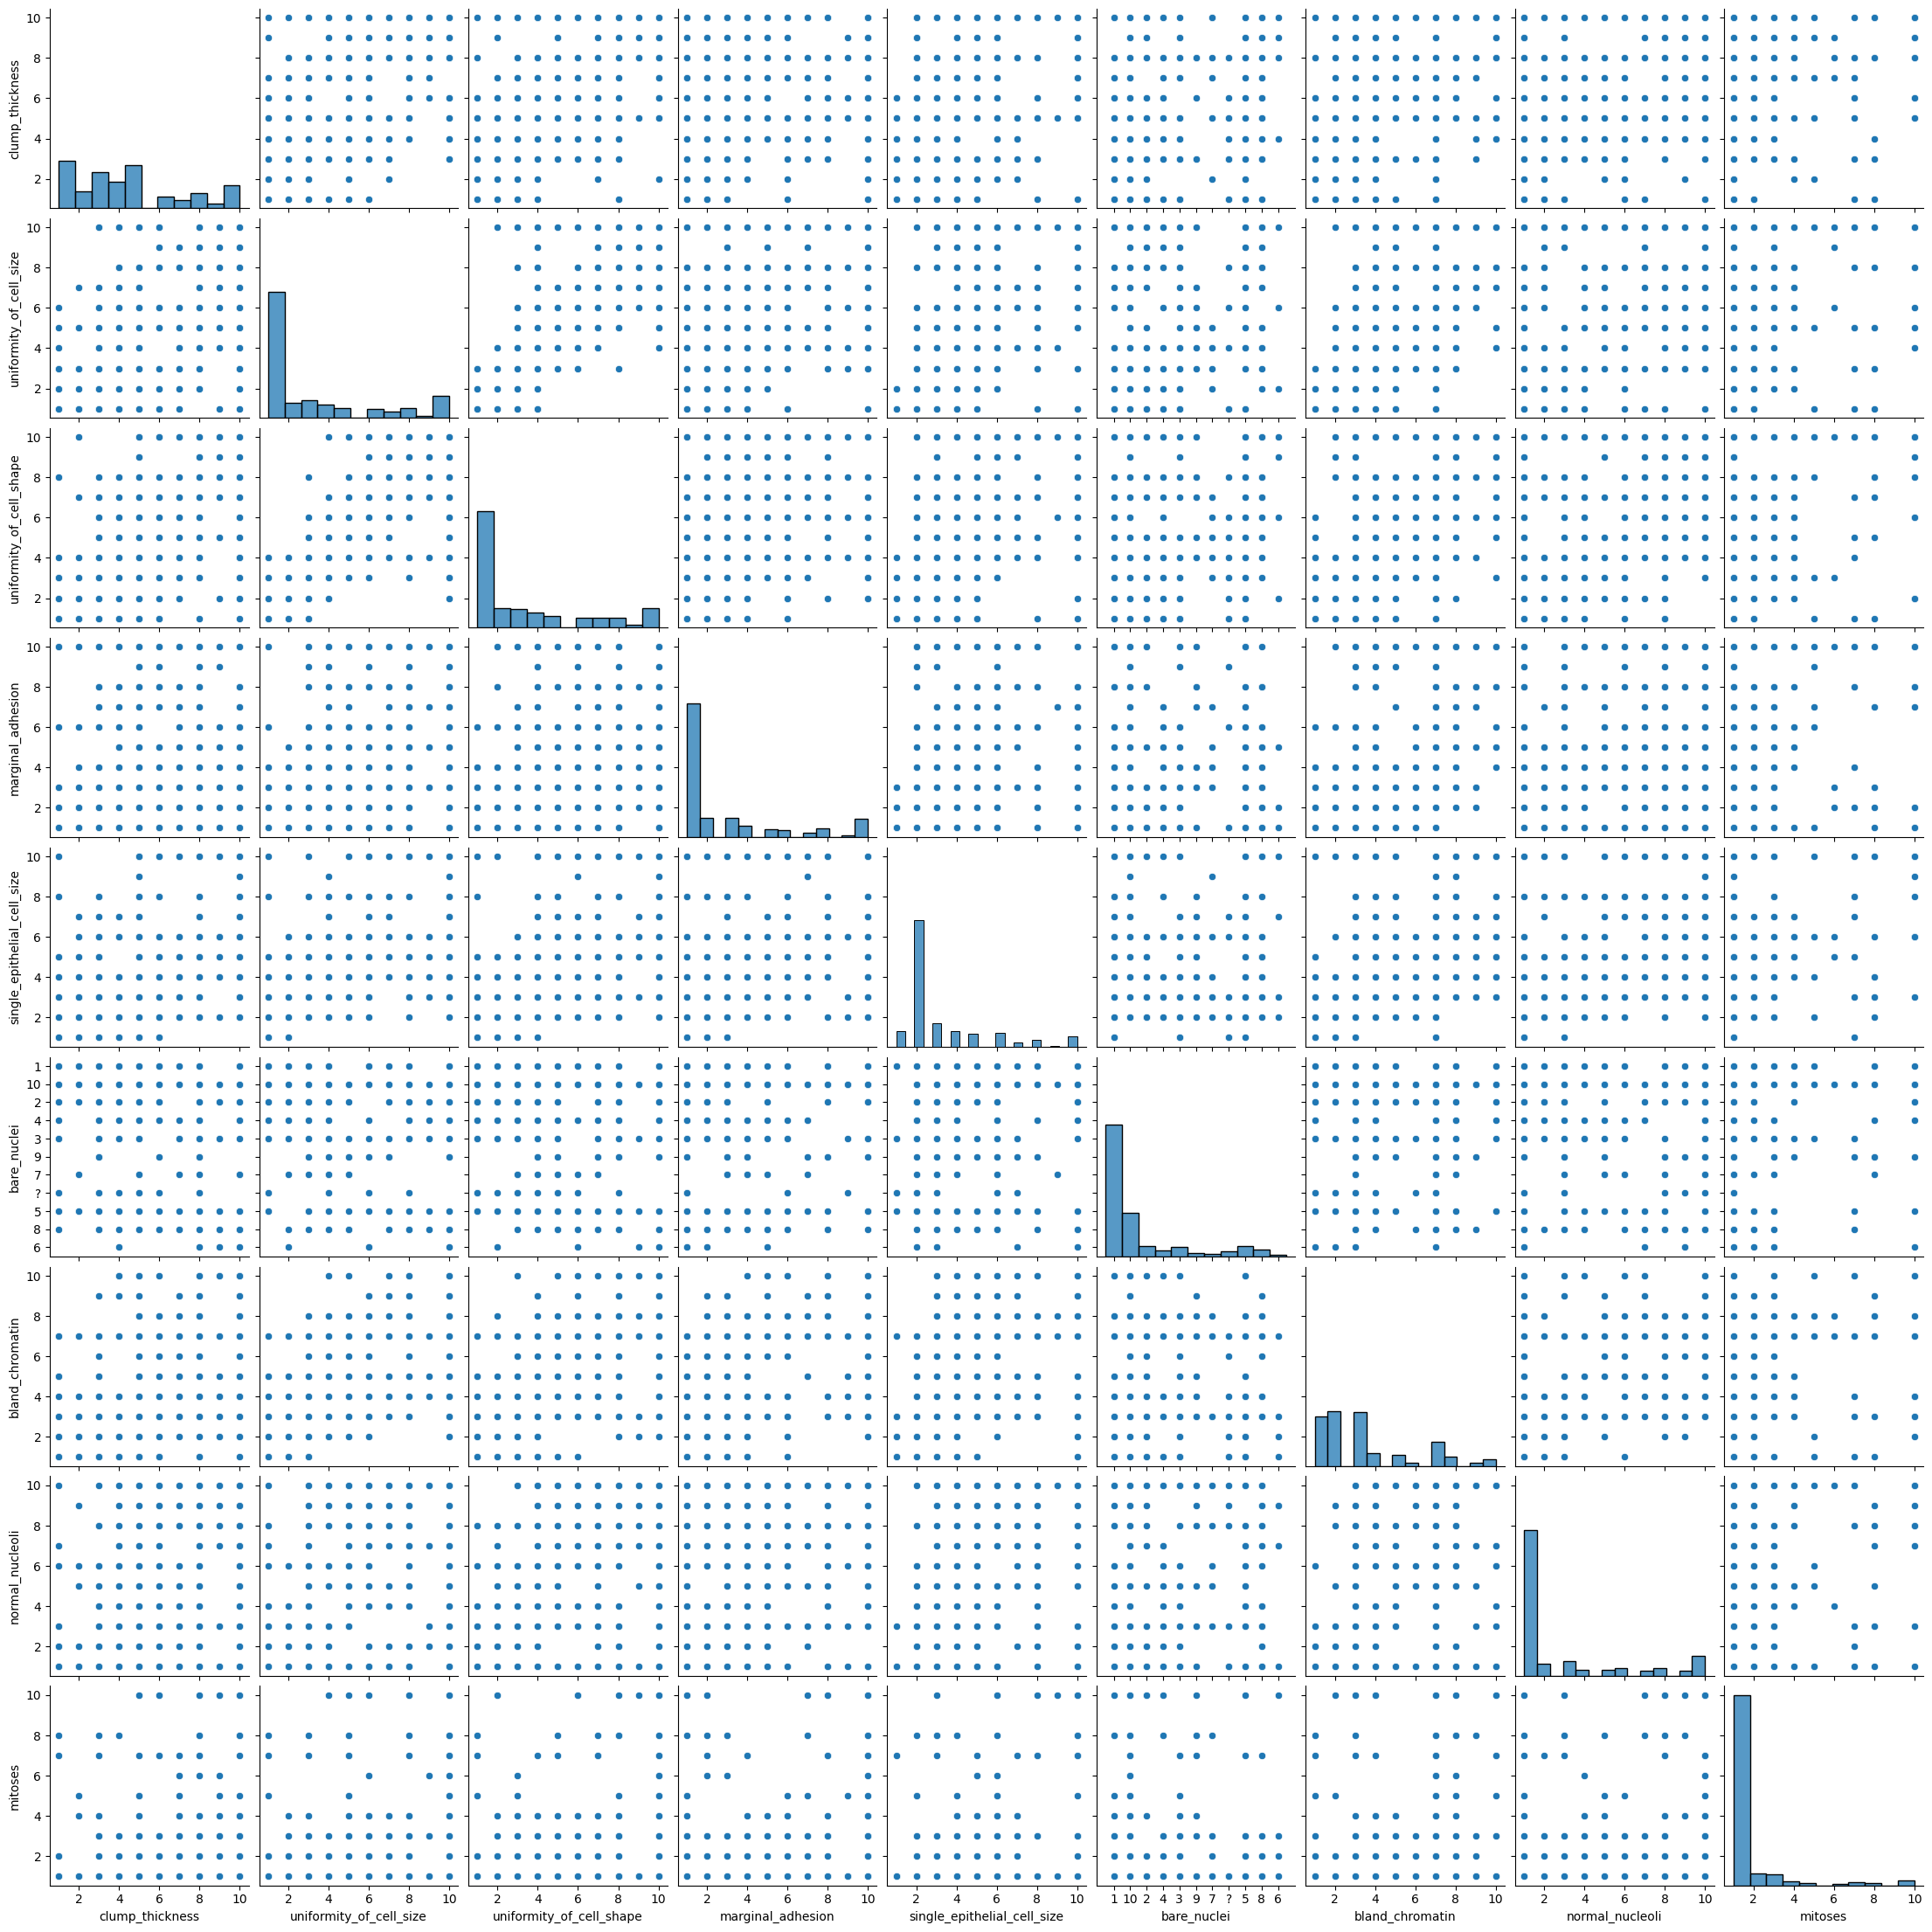

In [ ]:
sns.pairplot(data = l1, vars=['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'])
plt.show()

Correlation Matrix

C:\Users\mati\AppData\Local\Temp\ipykernel_3788\1000218593.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  l1[['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']].corr()
C:\Users\mati\AppData\Local\Temp\ipykernel_3788\1000218593.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(l1[['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']].corr(), annot=True, cmap = 'Reds')


<AxesSubplot:>

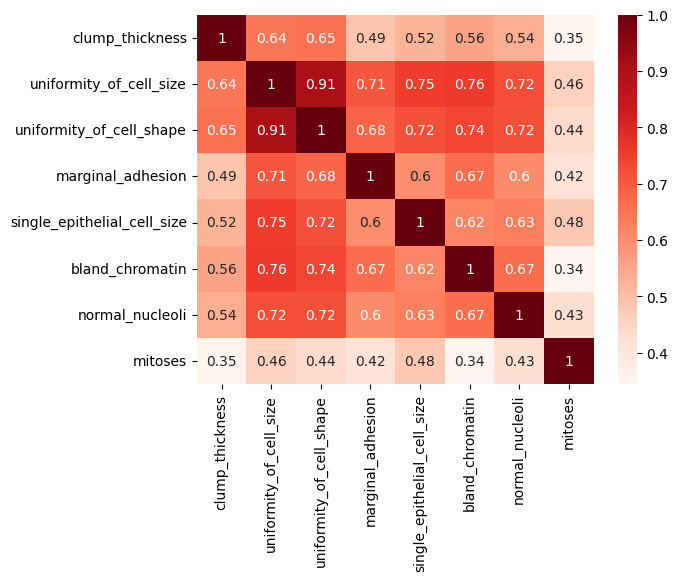

In [ ]:
l1[['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']].corr()

sns.heatmap(l1[['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']].corr(), annot=True, cmap = 'Reds')

Max and Min values

In [ ]:
for i in l1.columns:
    print(f'{i}')
    l1[l1[i] == l1[i].max()]
    l1[l1[i] == l1[i].min()]

Mean values of each class

In [ ]:
print("")
print("Finding the mean of each column")

l1.mean()


Finding the mean of each column


C:\Users\mati\AppData\Local\Temp\ipykernel_3788\1179065660.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  l1.mean()


id                             1.071704e+06
clump_thickness                4.417740e+00
uniformity_of_cell_size        3.134478e+00
uniformity_of_cell_shape       3.207439e+00
marginal_adhesion              2.806867e+00
single_epithelial_cell_size    3.216023e+00
bland_chromatin                3.437768e+00
normal_nucleoli                2.866953e+00
mitoses                        1.589413e+00
class                          2.689557e+00
dtype: float64

Median values of each class

In [ ]:
print("")
print("Finding median of each column")

l1.median()


Finding median of each column


C:\Users\mati\AppData\Local\Temp\ipykernel_3788\3065736416.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  l1.median()


id                             1171710.0
clump_thickness                      4.0
uniformity_of_cell_size              1.0
uniformity_of_cell_shape             1.0
marginal_adhesion                    1.0
single_epithelial_cell_size          2.0
bland_chromatin                      3.0
normal_nucleoli                      1.0
mitoses                              1.0
class                                2.0
dtype: float64

KDE plot

TypeError: no numeric data to plot

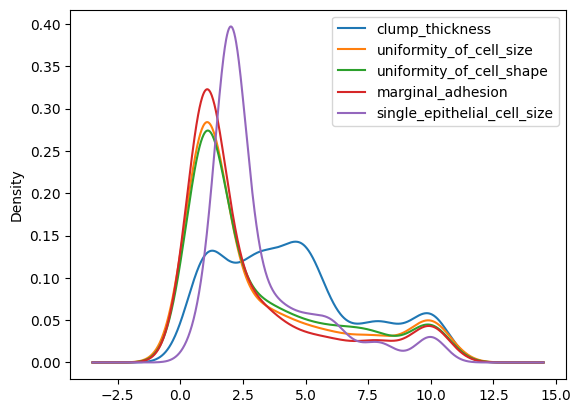

In [ ]:
for column in ['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']:
    l1[column].plot.kde(label=column)
    plt.legend()
    plt.show

<AxesSubplot:ylabel='Count'>

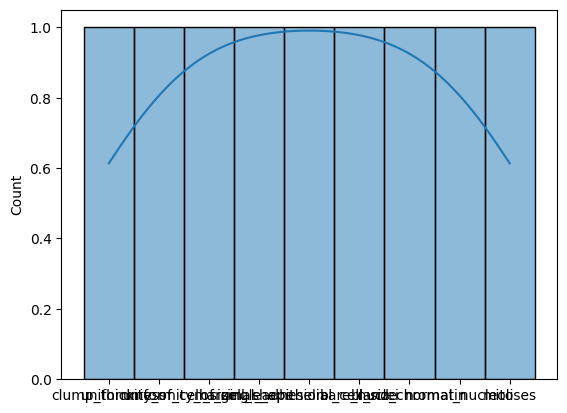

In [ ]:
sns.histplot(x=['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'], data=l1.columns, kde=True)